In [77]:
# 引入 library
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np

In [78]:
# 讀取資料
path = 'DB1_s1/'
mat = 'S1_A1_E1'
data = sio.loadmat((path+mat))
plt.close()

In [79]:
emg = data['emg']
glove = data['glove']
stimulus = data['stimulus']
repetition = data['repetition']
restimulus = data['restimulus']
rerepetition = data['rerepetition']

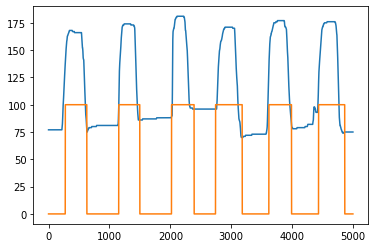

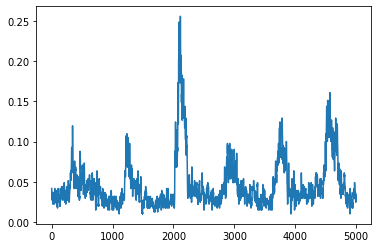

In [80]:
# 畫出部分資料
begin = 1000
end = 6000
glove_ID = 5
emg_ID = 7
# 手套數據
plt.plot(glove.T[glove_ID][begin:end])
# 所執行的動作數據(優化後)
plt.plot(restimulus[begin:end]*100)
plt.show()
# emg 訊號
plt.plot(emg.T[emg_ID][begin:end])
plt.show()

In [81]:
# 設定窗口大小與位移量(單位:sample point)
sliding_window_size = 260
sliding_duration = 80

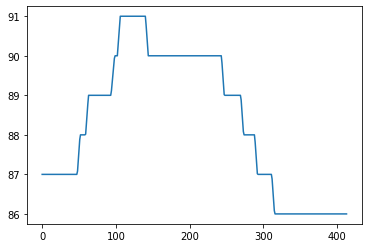

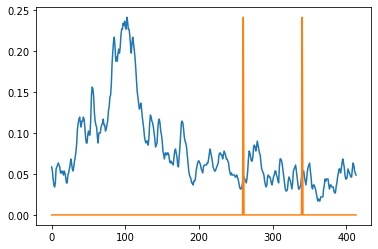

In [82]:
# 預覽分割後圖形樣子
begin = 100300
end = 100714
glove_ID = 5
emg_ID = 7
duration = np.zeros(end-begin)
n = 0
# 手套數據
yes = max(glove.T[glove_ID][begin:end])
for i in range(end-begin):
    if i == sliding_window_size+sliding_duration*n:
        duration[i] = yes
        n = n + 1
plt.plot(glove.T[glove_ID][begin:end])
# 所執行的動作數據(優化後)
# plt.plot(restimulus[begin:end]*100)
# plt.plot(duration)
plt.show()
# emg 訊號
duration = list(map(lambda x:x/max(glove.T[glove_ID][begin:end])*max(emg.T[emg_ID][begin:end]), duration))
plt.plot(emg.T[emg_ID][begin:end])
plt.plot(duration)
plt.show()

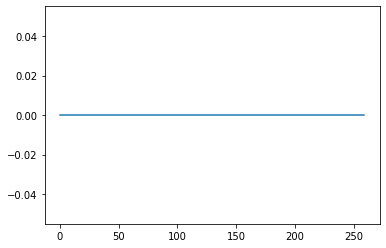

0


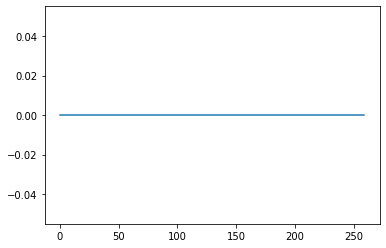

0


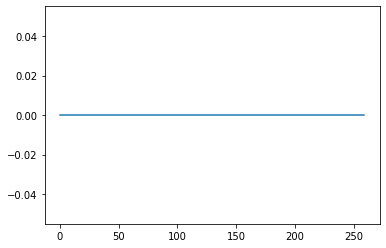

0


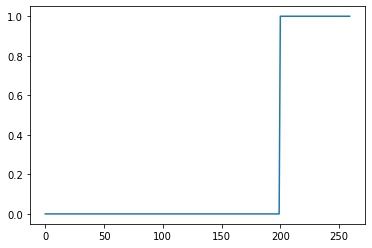

0


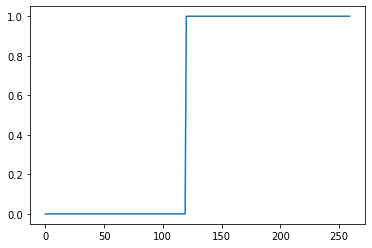

1


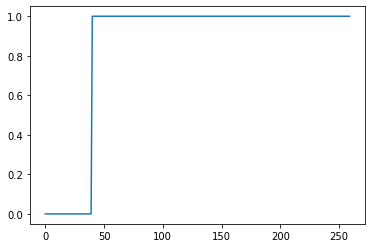

1


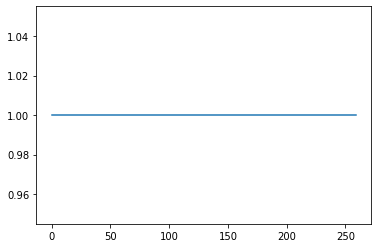

1


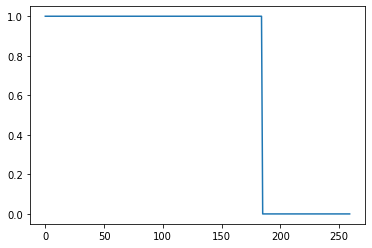

1


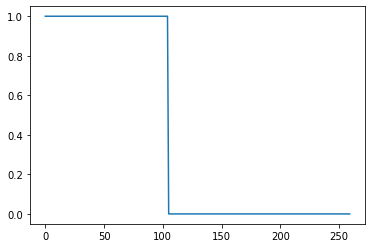

0


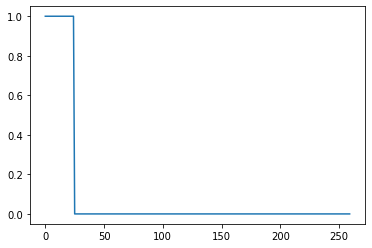

0


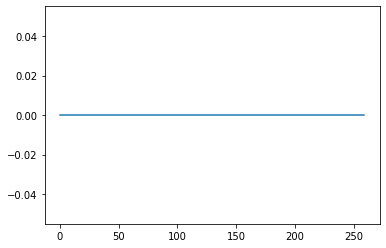

0


In [83]:
# 資料預處理
import math
import pywt

total_len = len(glove.T[5])
# math.ceil -> 無條件進位
sliding_times = math.ceil((total_len - sliding_window_size) / sliding_duration) + 1

# 資料分割 + 特徵提取
window_begin = 0
for i in range(sliding_times):
#   特徵提取
    feature_matrix = []
    for e in emg.T:
        emg_segment = e[window_begin:window_begin+sliding_window_size]
    #   使用多階小波包轉換
    #   小波包基底: db5
    #   層數: 4
        wp = pywt.WaveletPacket(data=emg_segment, wavelet='db5', mode='symmetric', maxlevel=4)
    #   對第四層每一節點做能量值計算
        wavelet_energy = []
        for j in [node.path for node in wp.get_level(wp.maxlevel, 'natural')]:
            wavelet_energy.append(np.sum( (np.array(wp[j].data)) ** 2 ))
        feature_matrix.append(wavelet_energy)
#   標標籤
    restimulus_segment = restimulus[window_begin:window_begin+sliding_window_size]
#   np.sqeeze()把矩陣內的單維向量的框框消掉
    counts = np.bincount(np.squeeze(restimulus_segment))
    #返回眾數(注意:此方法只有非負數列才可使用)
    label_action_ID = np.argmax(counts)
#   印出測試用
    if i < sliding_times-1250:
        plt.plot(restimulus_segment)
        plt.show()
        print(label_action_ID)
    window_begin = window_begin + sliding_duration